In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [71]:
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'font.size': 12
})

In [115]:
tests_dir = "../tests/test_grad_lin/"

data_files = sorted(os.listdir(tests_dir), key=len)

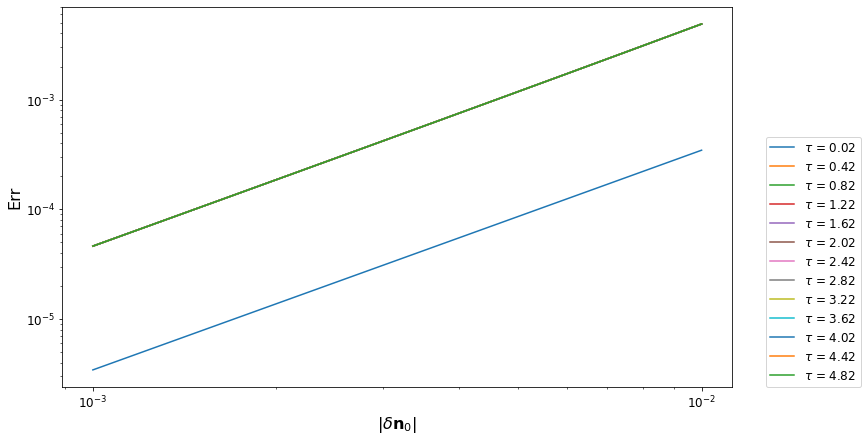

In [116]:
x = np.logspace(-3, -2, 10)

for idx, data_file in enumerate(data_files[::20]):
    data = pd.read_csv(os.path.join(tests_dir, data_file), sep=" ", names=["id"] + list(range(1, 11))).iloc[:, 1:]
    envelope = np.max(data.values, axis=0)
    
    plt.plot(x, envelope, label=fr"$\tau$ = {np.round((20 * idx + 1) * 0.02, 2)}")
    
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)    
plt.xlabel(r'$\|\delta \mathbf{n}_0\|$', fontsize=16)
plt.ylabel('Err', fontsize=16)
plt.xscale("log")
plt.yscale("log")
#plt.savefig("error_level_lines_lin.png", dpi=300)

In [97]:
tests_sphere_dir = "../tests/test_sphere_grad_gauss/"

data_sphere_files = sorted(os.listdir(tests_sphere_dir), key=len)

In [98]:
tst = pd.read_csv(os.path.join(tests_sphere_dir, data_sphere_files[0]), sep=" ", names=["x", "y", "z", "mgrad"])

In [99]:
data_sphere_files.head()

AttributeError: 'list' object has no attribute 'head'

In [123]:
tests_sphere_dir = "../tests/test_sphere_grad_gauss/"
data_sphere_files = sorted(os.listdir(tests_sphere_dir), key=len)
sp = pd.read_csv(os.path.join(tests_sphere_dir, data_sphere_files[125]), sep=" ", names=["x", "y", "z", "mgrad"])

In [124]:
x = sp.x.values
y = sp.y.values
z = sp.z.values
g = sp.mgrad.values

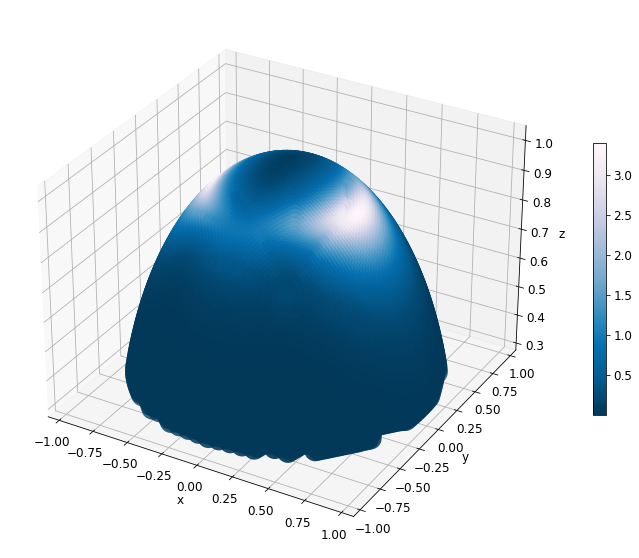

In [113]:
x = sp.x.values
y = sp.y.values
z = sp.z.values
g = sp.mgrad.values

fig, ax = plt.subplots(figsize=(15, 10),subplot_kw={"projection": "3d"})
cf = ax.scatter(x, y, z, c=g, lw=0, s=500, cmap=cm.PuBu_r, antialiased=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.colorbar(cf, shrink=0.5, aspect=20)
fig.savefig("grad_gauss.png")

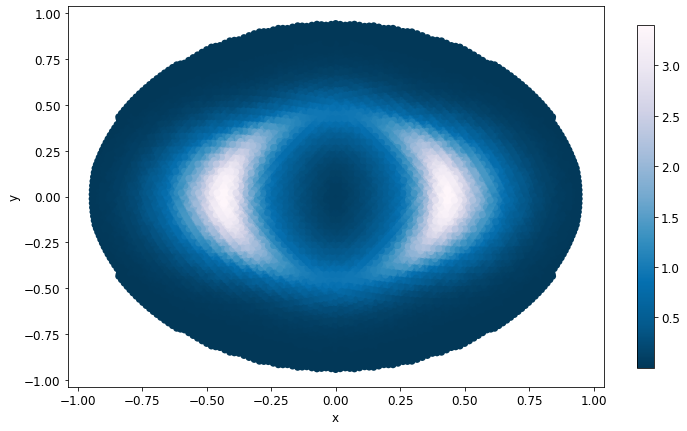

In [125]:
fig, ax = plt.subplots(figsize=(12, 7))
cf = ax.scatter(x, y, c=g, lw=0, s=50, cmap=cm.PuBu_r, antialiased=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(cf, shrink=0.9, aspect=20)
fig.savefig("proj_grad_gauss.png")

In [20]:
tests_sphere_dir = "../tests/test_sphere_grad_gauss/"
data_sphere_files = sorted(os.listdir(tests_sphere_dir), key=len)

res = np.zeros(250)

for idx, data_sphere_files in enumerate(data_sphere_files):
    sp = pd.read_csv(os.path.join(tests_sphere_dir, data_sphere_files), sep=" ", names=["x", "y", "z", "mgrad"])
    res[idx] = sp["mgrad"].max()

In [76]:
tests_dir = "../tests/test_grad_step/"
tech_file = "tech.log"

tech_info = pd.read_csv(os.path.join(tests_dir, tech_file), sep=" ", names=["epoch", "max_edge_len", "cnt_tube", 
                                                                            "all_trace","add_trace"])

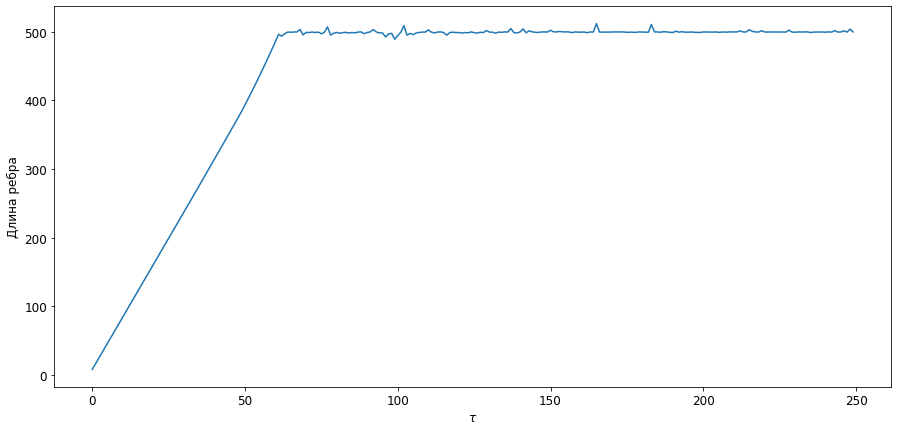

In [77]:
plt.plot(tech_info.epoch, tech_info.max_edge_len)
plt.xlabel(r"$\tau$")
plt.ylabel("Длина ребра")
plt.savefig("grad_step_edge_len.png")

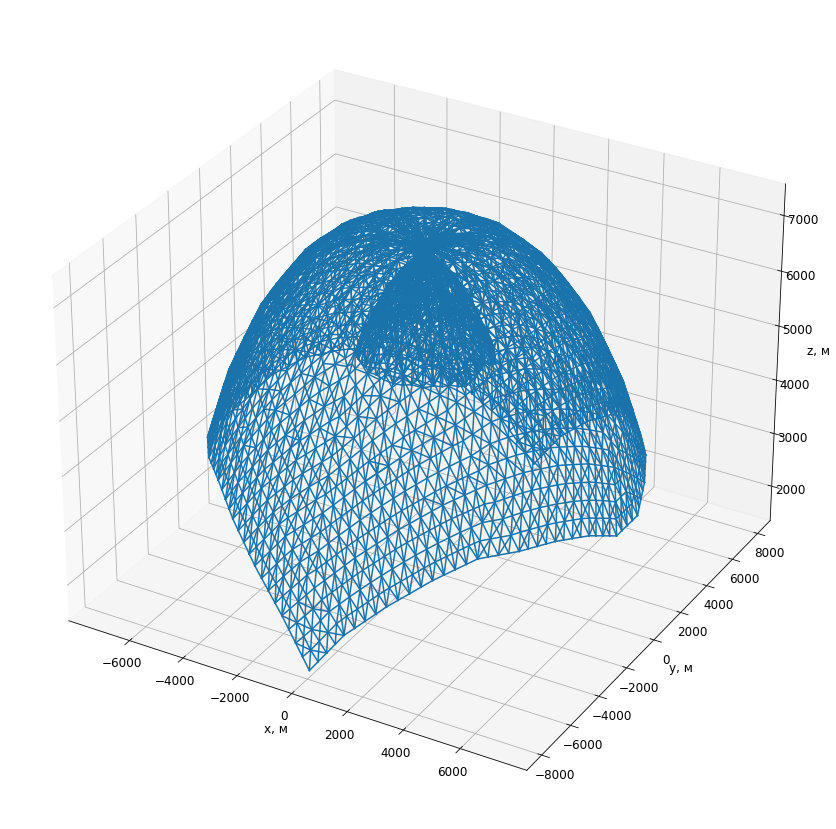

In [105]:
epoch=200

test_sg_dir = "../tests/test_grad_step/"
data_file = f"data_t={epoch}.log"

data_momentum = pd.read_csv(os.path.join(test_sg_dir, data_file), sep=" ", names=["edge_num", "x", "y", "z"], index_col = False)

ax = plt.figure(figsize=(15, 15)).add_subplot(projection='3d')

for idx in range(len(data_momentum) // 2):
    x = data_momentum.query(f"edge_num=={idx}").x.values.reshape(-1)
    y = data_momentum.query(f"edge_num=={idx}").y.values.reshape(-1)
    z = data_momentum.query(f"edge_num=={idx}").z.values.reshape(-1)
    ax.plot(x, y, z, color='#1a73ab')
    ax.set_xlabel("x, м")
    ax.set_ylabel("y, м")
    ax.set_zlabel("z, м")
    
plt.savefig("grad_step.png")

In [94]:
tests_dir = "../tests/test_direct_search/"
tech_file = "tech.log"

tech_info = pd.read_csv(os.path.join(tests_dir, tech_file), sep=" ", names=["epoch", "max_edge_len", "cnt_tube", 
                                                                            "all_trace","add_trace"])

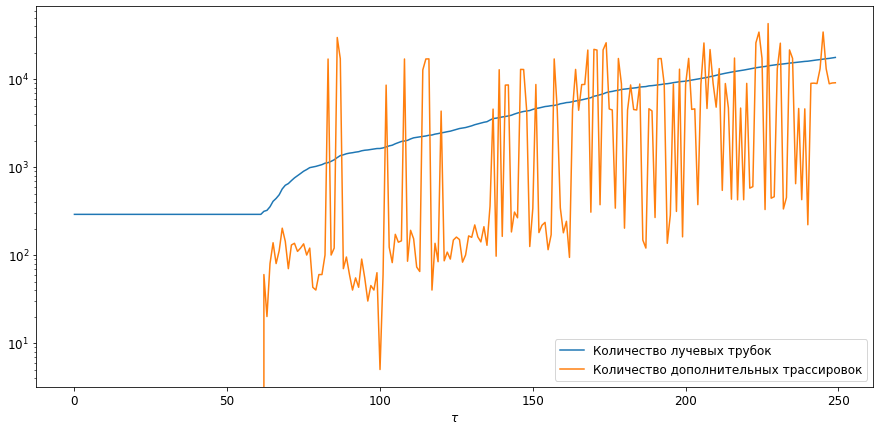

In [95]:
plt.plot(tech_info.epoch, tech_info.cnt_tube, label="Количество лучевых трубок")
plt.plot(tech_info.epoch, tech_info.add_trace, label="Количество дополнительных трассировок")
plt.yscale("log")
plt.xlabel(r"$\tau$")
plt.legend()
plt.savefig("add_trac_direct_search.png")

In [84]:
tests_direct_search_dir = "../tests/test_direct_search/"
tests_grad_step_dir = "../tests/test_grad_step/"
tests_grad_impulse_dir = "../tests/test_sg/"
tech_file = "tech.log"

tech_info_direct_search = pd.read_csv(os.path.join(tests_direct_search_dir, tech_file), sep=" ", names=["epoch", "max_edge_len",
                                                                                                        "cnt_tube", "all_trace",
                                                                                                        "add_trace"])

tech_info_grad_step = pd.read_csv(os.path.join(tests_grad_step_dir, tech_file), sep=" ", names=["epoch", "max_edge_len", 
                                                                                                "cnt_tube", "all_trace",
                                                                                                "add_trace"])

tech_info_grad_impulse = pd.read_csv(os.path.join(tests_grad_impulse_dir, tech_file), sep=" ", names=["epoch", "max_edge_len", 
                                                                                                      "cnt_tube", "all_trace",
                                                                                                      "add_trace"])

In [130]:
tech_info_direct_search.cnt_tube

0        290
1        290
2        290
3        290
4        290
       ...  
245    16864
246    17037
247    17182
248    17394
249    17619
Name: cnt_tube, Length: 250, dtype: int64

In [146]:
np.min(tech_info_grad_step.cnt_tube - tech_info_grad_impulse.cnt_tube)

-72

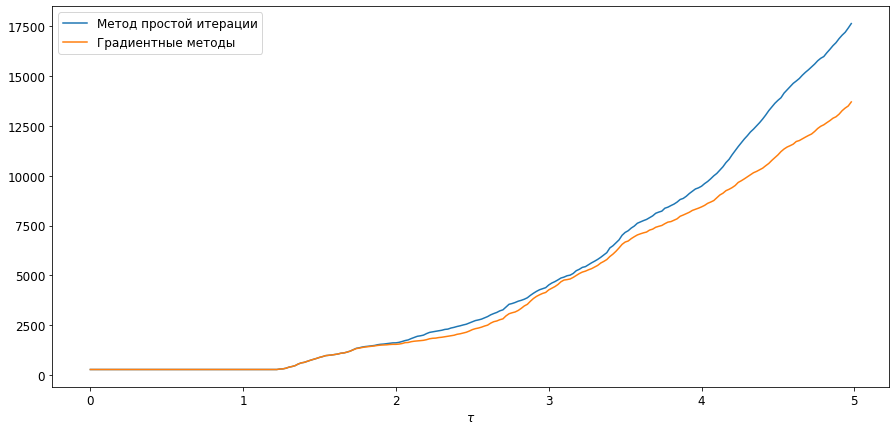

In [149]:
plt.plot(tech_info_direct_search.epoch * 0.02, tech_info_direct_search.cnt_tube, label="Метод простой итерации")
plt.plot(tech_info_grad_step.epoch * 0.02, tech_info_grad_step.cnt_tube, label="Градиентные методы")
plt.xlabel(r"$\tau$")
plt.legend()
plt.savefig("comp_all_tube.png")

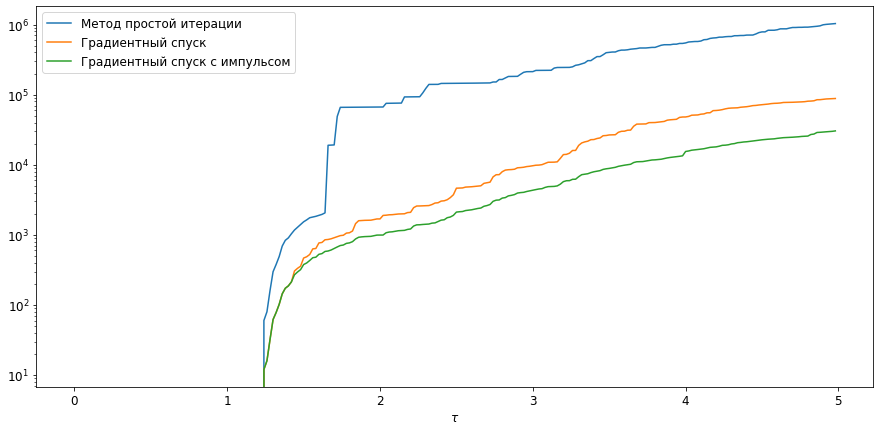

In [131]:
plt.plot(tech_info_direct_search.epoch * 0.02, np.cumsum(tech_info_direct_search.add_trace), label="Метод простой итерации")
plt.plot(tech_info_grad_step.epoch * 0.02, np.cumsum(tech_info_grad_step.add_trace), label="Градиентный спуск")
plt.plot(tech_info_grad_impulse.epoch * 0.02, np.cumsum(tech_info_grad_impulse.add_trace), label="Градиентный спуск с импульсом")
plt.yscale("log")
plt.xlabel(r"$\tau$")
plt.legend()
plt.savefig("comp_num_trac.png")

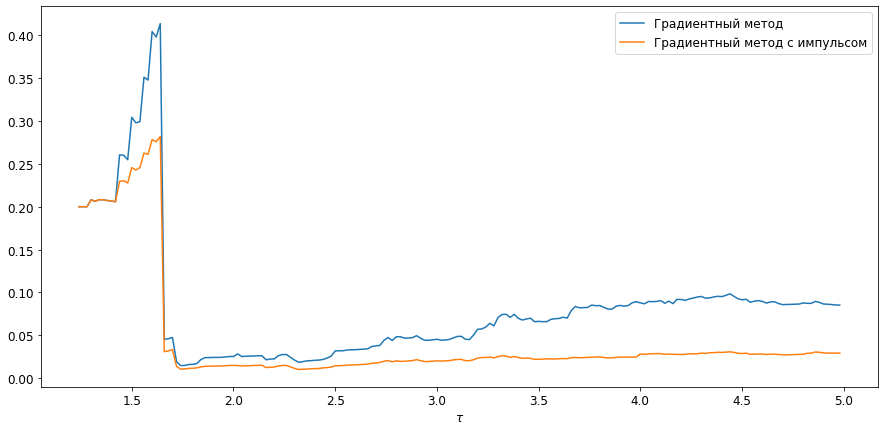

In [92]:
plt.plot(tech_info_grad_step.epoch * 0.02,  
         np.cumsum(tech_info_grad_step.add_trace) / np.cumsum(tech_info_direct_search.add_trace), 
         label="Градиентный метод")

plt.plot(tech_info_grad_step.epoch * 0.02,  
         np.cumsum(tech_info_grad_impulse.add_trace) / np.cumsum(tech_info_direct_search.add_trace), 
         label="Градиентный метод с импульсом")

plt.xlabel(r"$\tau$")
plt.legend()
plt.savefig("comp_complexity.png")

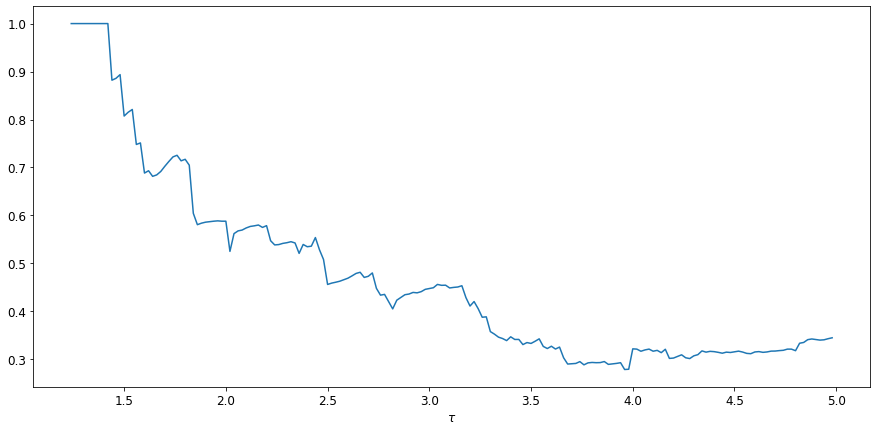

In [93]:
plt.plot(tech_info_grad_step.epoch * 0.02,  
         np.cumsum(tech_info_grad_impulse.add_trace) / np.cumsum(tech_info_grad_step.add_trace))

plt.xlabel(r"$\tau$")
plt.savefig("comp_grad_complexity.png")